In [1]:
from meld_graph.evaluation import load_prediction
from meld_graph.experiment import Experiment
import h5py
from meld_classifier.meld_cohort import MeldCohort
import matplotlib_surface_plotting as msp
from meld_classifier.paths import NVERT
import numpy as np
import os
import matplotlib.pyplot as plt

Setting MELD_DATA_PATH to /home/co-spit1/meld_data
Setting BASE_PATH to /home/co-spit1/meld_data
Setting EXPERIMENT_PATH to /home/co-spit1/meld_experiments/co-spit1
Setting FS_SUBJECTS_PATH to /home/co-spit1/meld_data/output/fs_outputs
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1


In [2]:
model_name = '/home/co-spit1/software/meld_classifier_GDL/meld_experiments_graph/co-spit1/23-03-01_WRZI_classification_distance/s_0/fold_all'
exp = Experiment.from_folder(model_name)
features = exp.data_parameters['features']
cohort = exp.cohort

prediction_fname = os.path.join(model_name, 'results/predictions.hdf5')
subjects = h5py.File(prediction_fname, 'r').keys()

Initialised Experiment 23-03-01_WRZI_classification_distance/s_0


In [3]:
subjects = ['MELD_H4_3T_FCD_0011','MELD_H16_3T_FCD_004']

In [6]:
# load and plot subject
prediction = load_prediction(subjects[1], prediction_fname, dset="prediction")
saliency = load_prediction(subjects[1], prediction_fname, dset="integrated_gradients_pred")

In [7]:
def add_medial_wall(arr):
    res = np.zeros((NVERT,) + arr.shape[1:])
    res[cohort.cortex_label] = arr
    return res


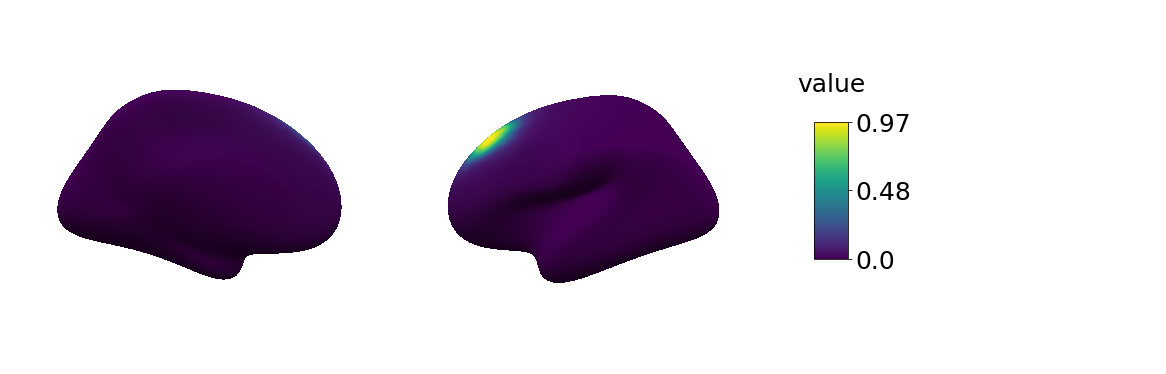

In [10]:
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'],add_medial_wall(prediction['lh']))

/home/co-spit1/.conda/envs/meld_test/lib/python3.9/site-packages/matplotlib_surface_plotting/matplotlib_surface_plotting.py:307: RuntimeWarning: invalid value encountered in true_divide
  colours = (colours - colours.min())/(colours.max()-colours.min())
/tmp/ipykernel_1054161/1773784909.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

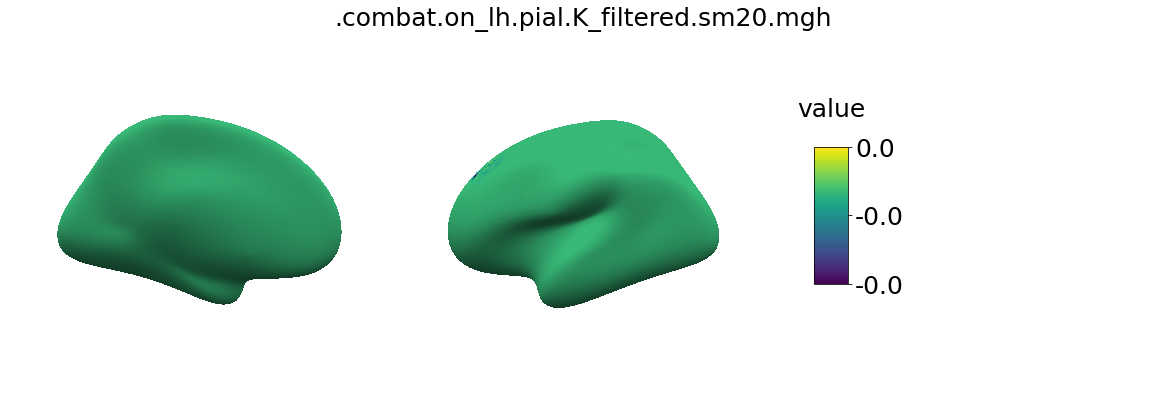

<Figure size 432x288 with 0 Axes>

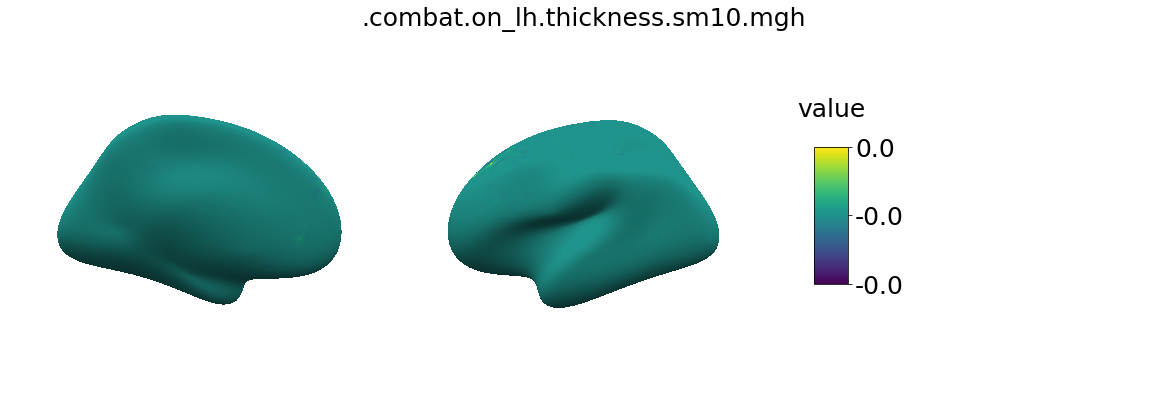

<Figure size 432x288 with 0 Axes>

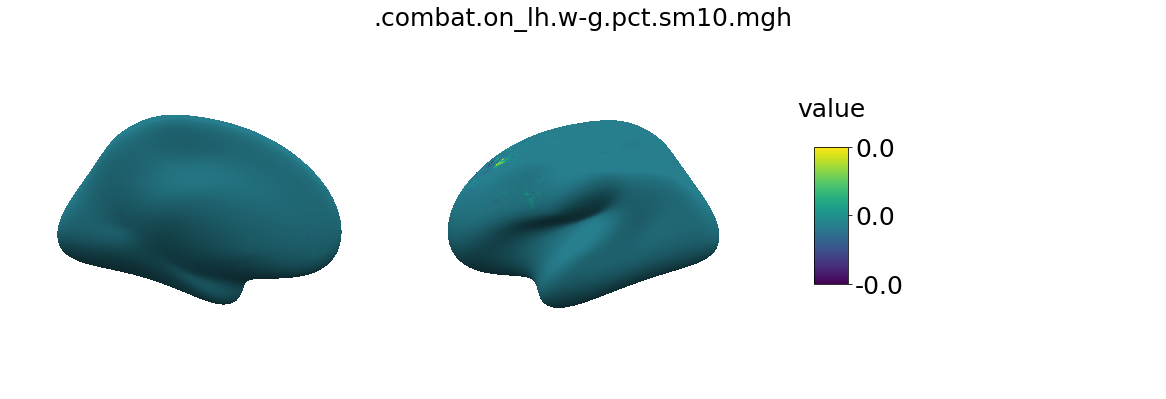

<Figure size 432x288 with 0 Axes>

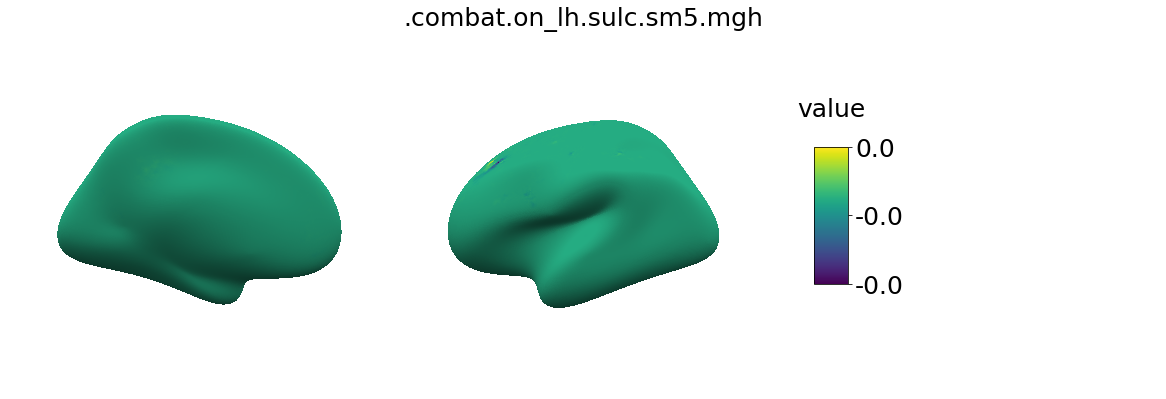

<Figure size 432x288 with 0 Axes>

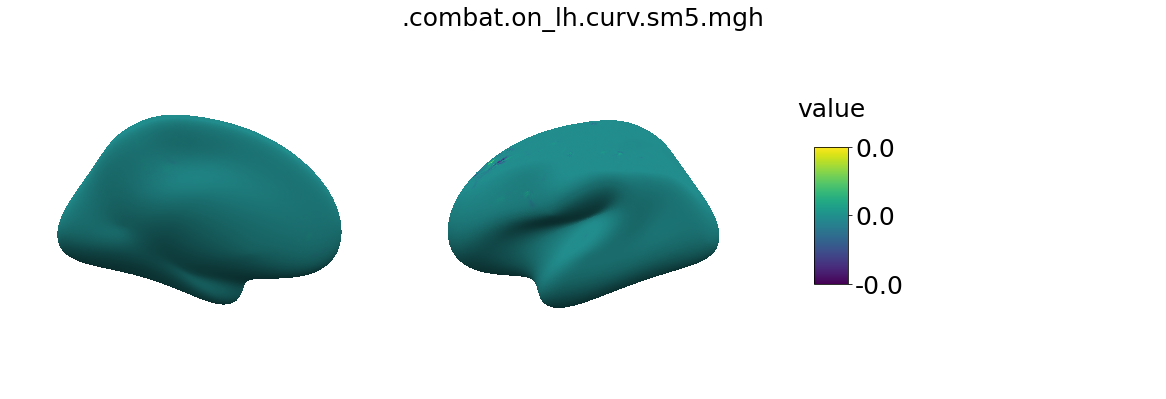

<Figure size 432x288 with 0 Axes>

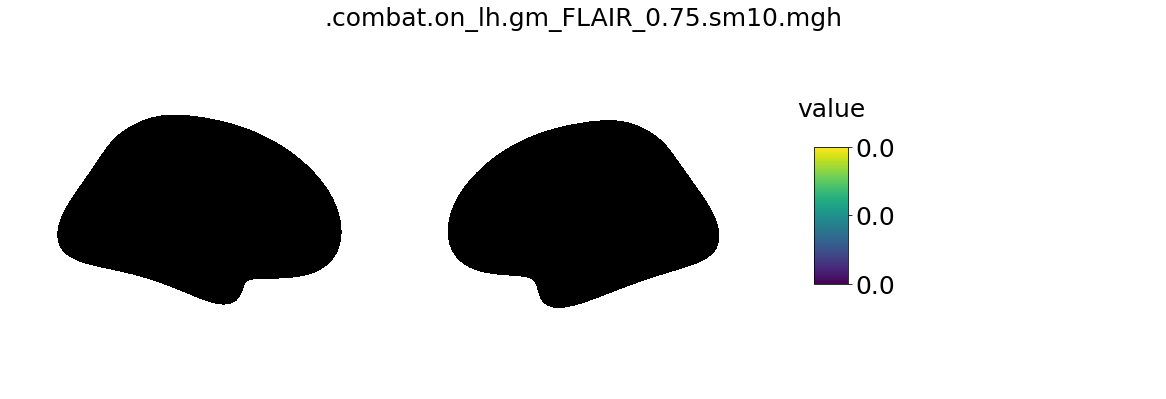

<Figure size 432x288 with 0 Axes>

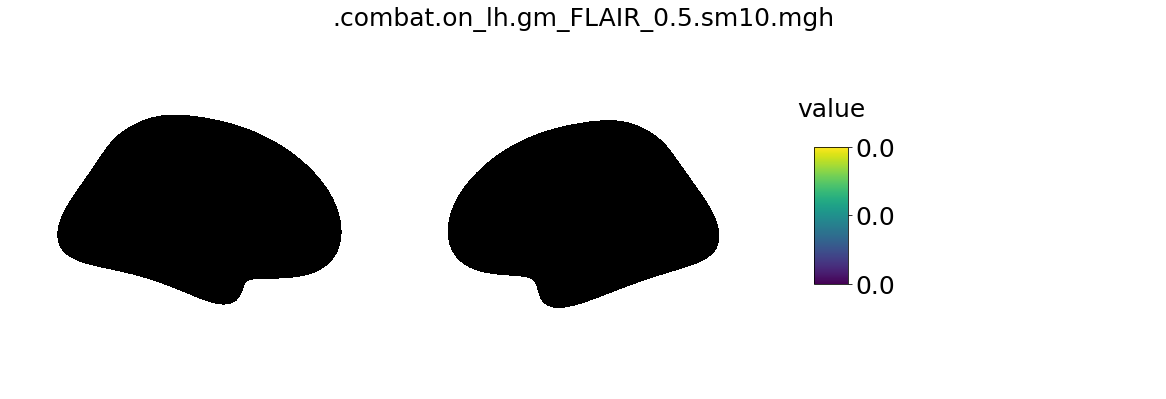

<Figure size 432x288 with 0 Axes>

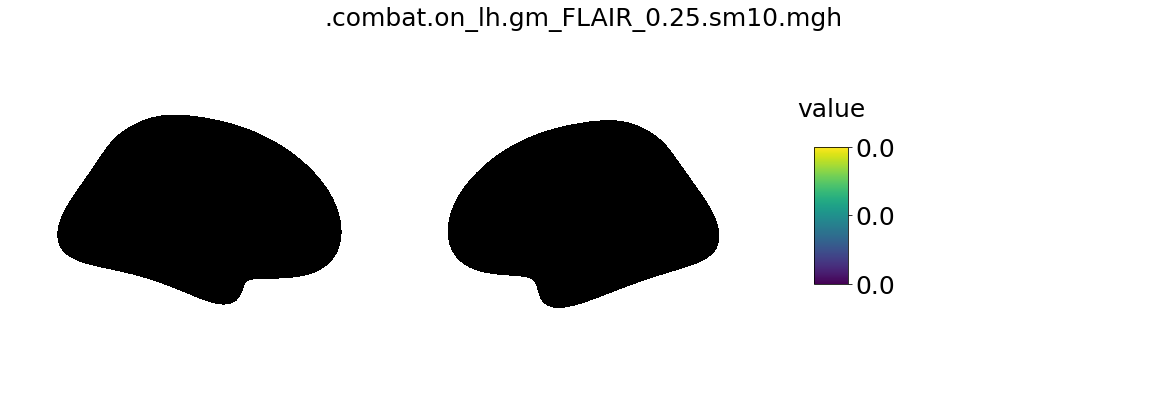

<Figure size 432x288 with 0 Axes>

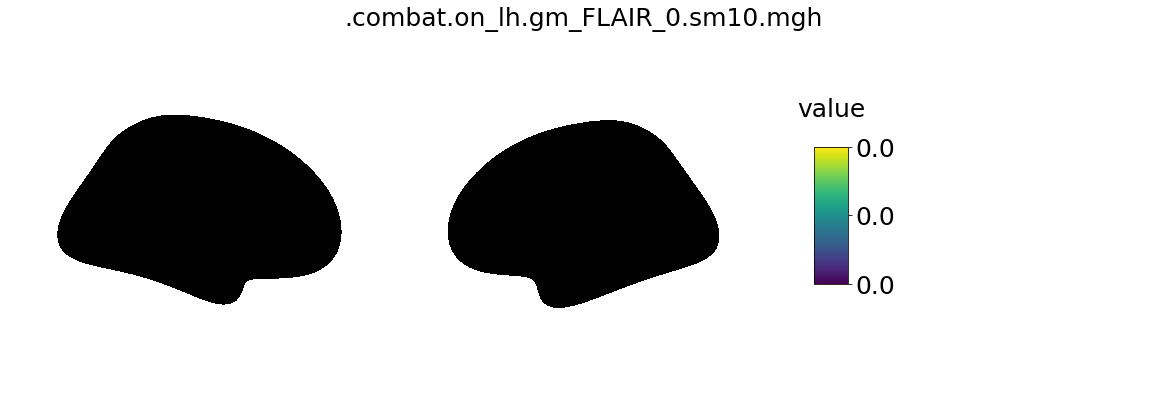

<Figure size 432x288 with 0 Axes>

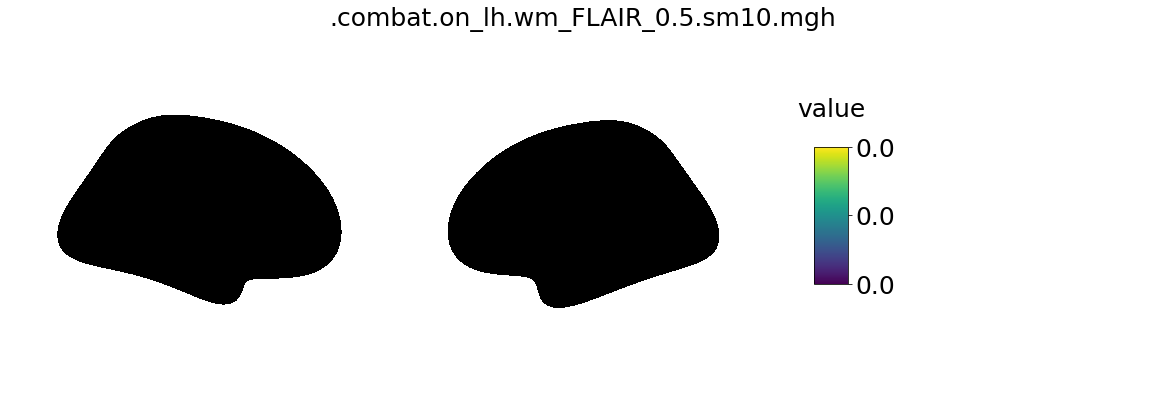

<Figure size 432x288 with 0 Axes>

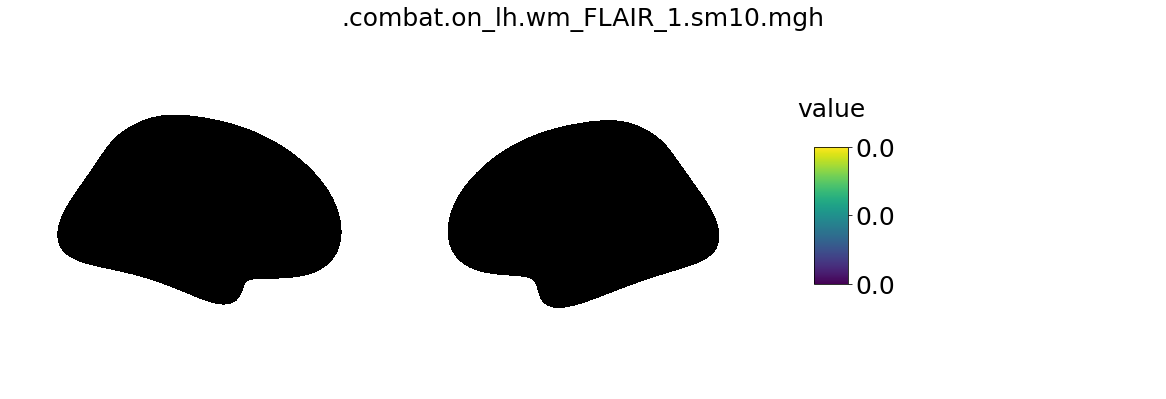

<Figure size 432x288 with 0 Axes>

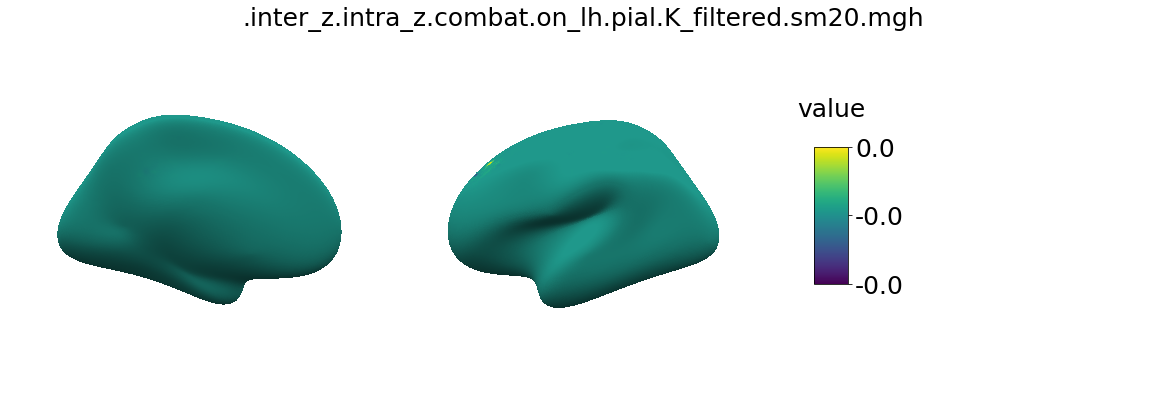

<Figure size 432x288 with 0 Axes>

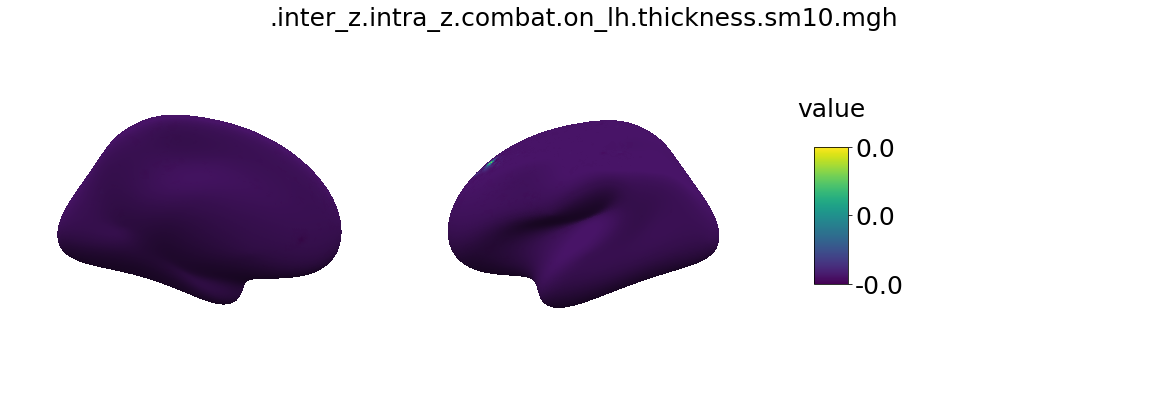

<Figure size 432x288 with 0 Axes>

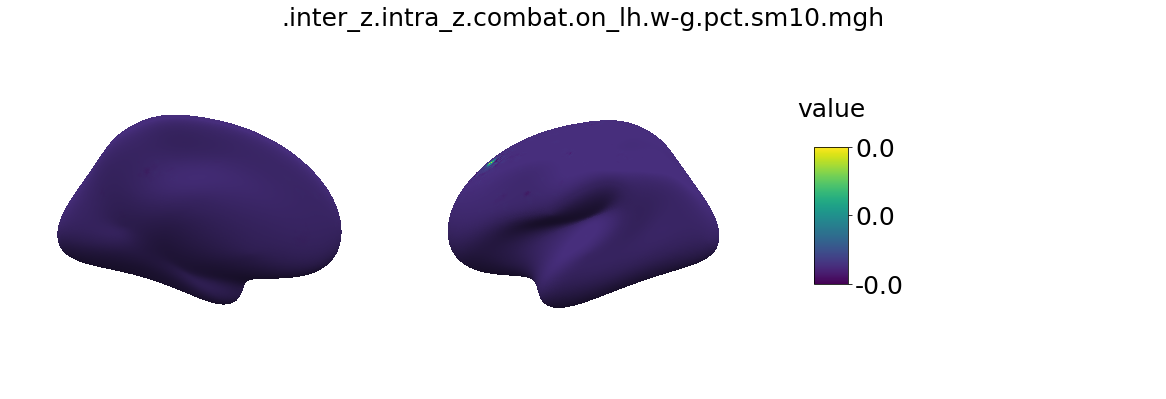

<Figure size 432x288 with 0 Axes>

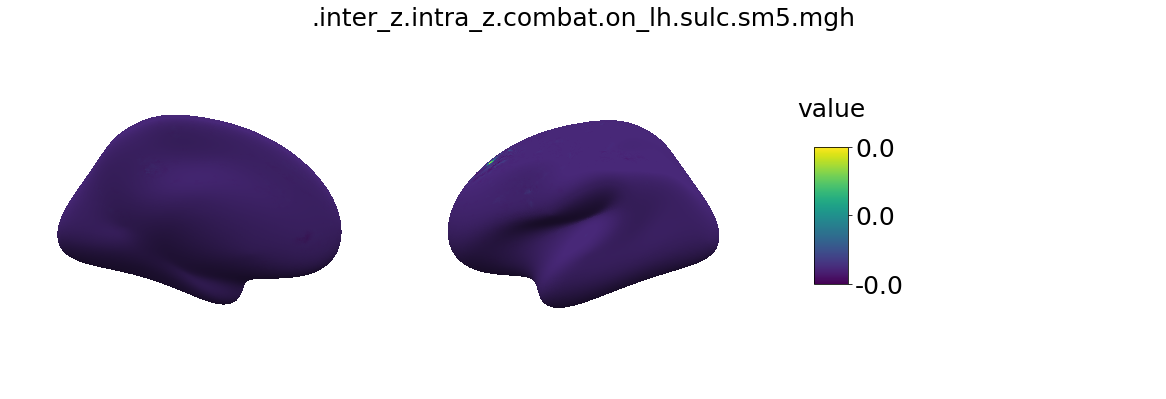

<Figure size 432x288 with 0 Axes>

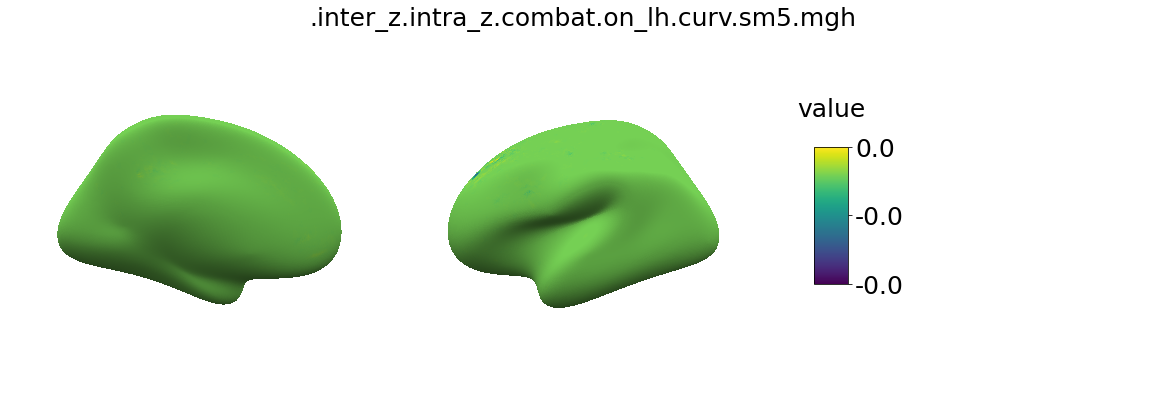

<Figure size 432x288 with 0 Axes>

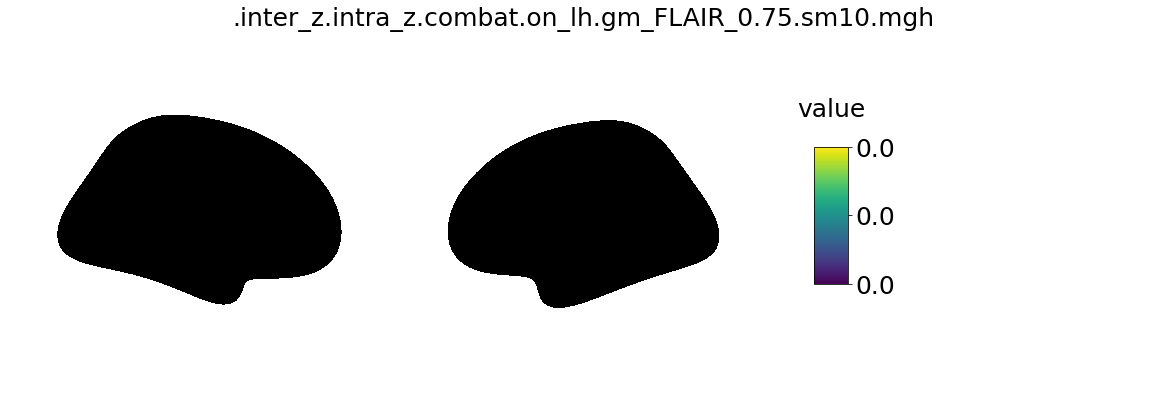

<Figure size 432x288 with 0 Axes>

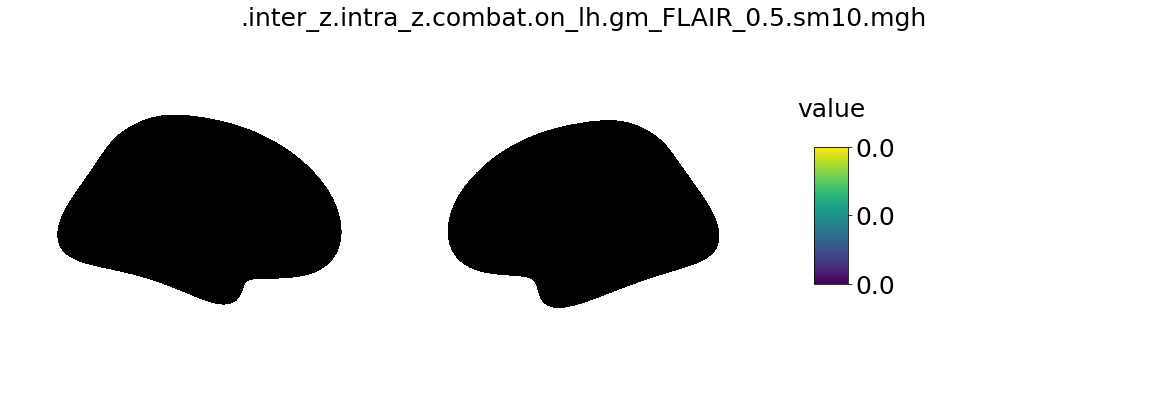

<Figure size 432x288 with 0 Axes>

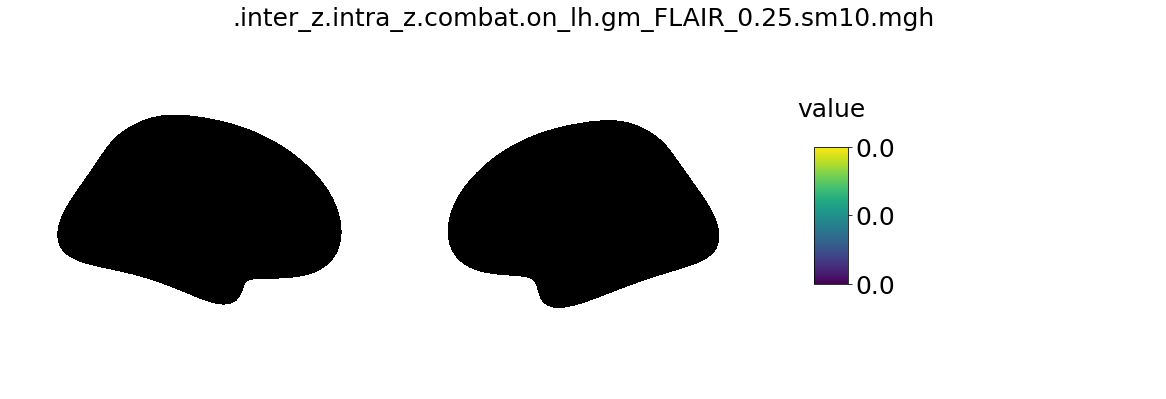

<Figure size 432x288 with 0 Axes>

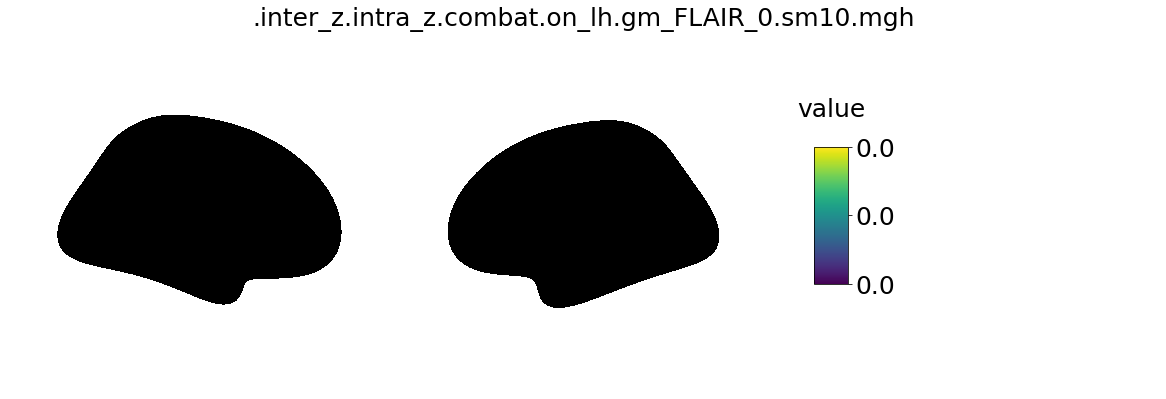

<Figure size 432x288 with 0 Axes>

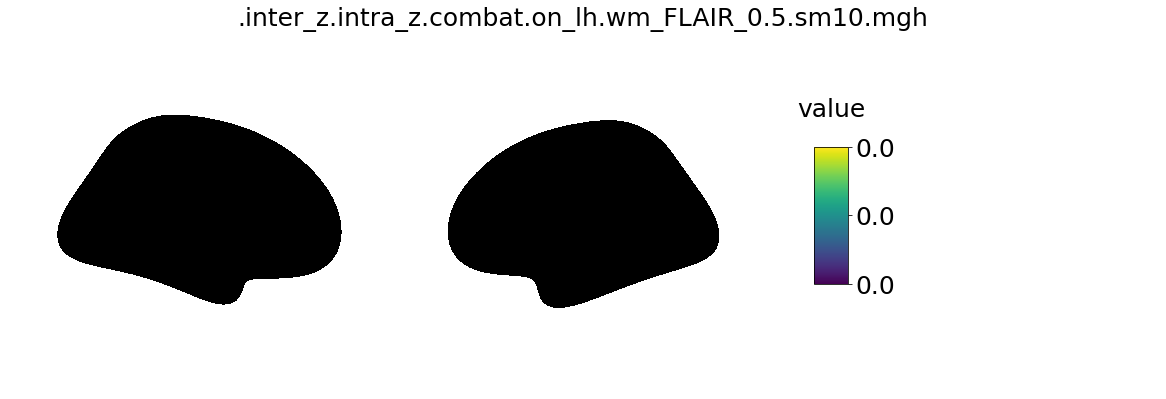

<Figure size 432x288 with 0 Axes>

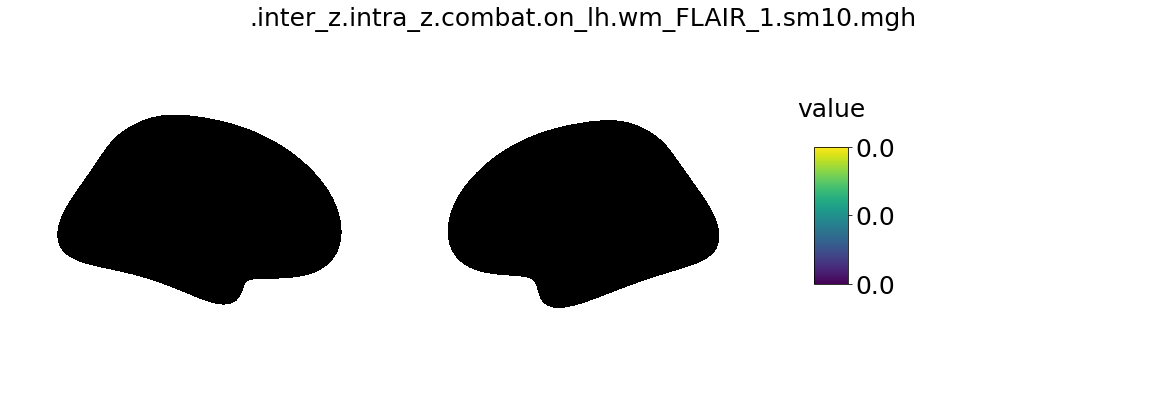

<Figure size 432x288 with 0 Axes>

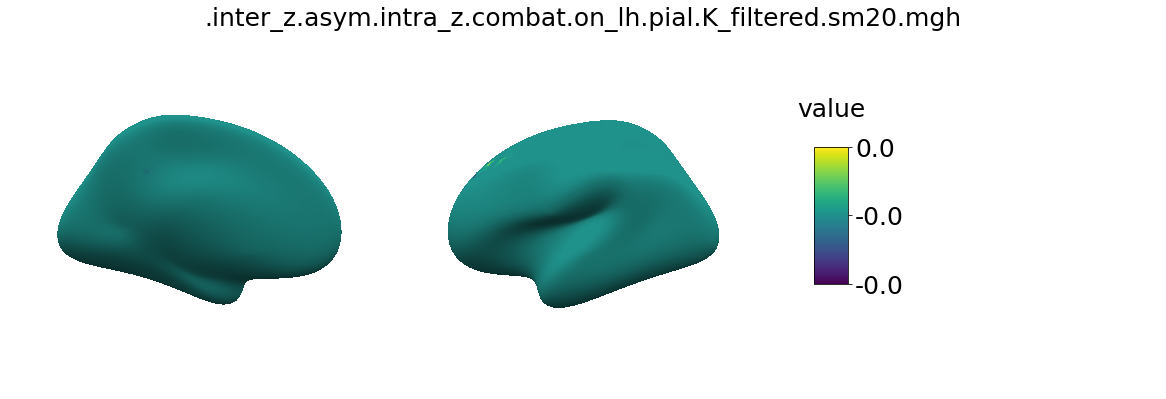

<Figure size 432x288 with 0 Axes>

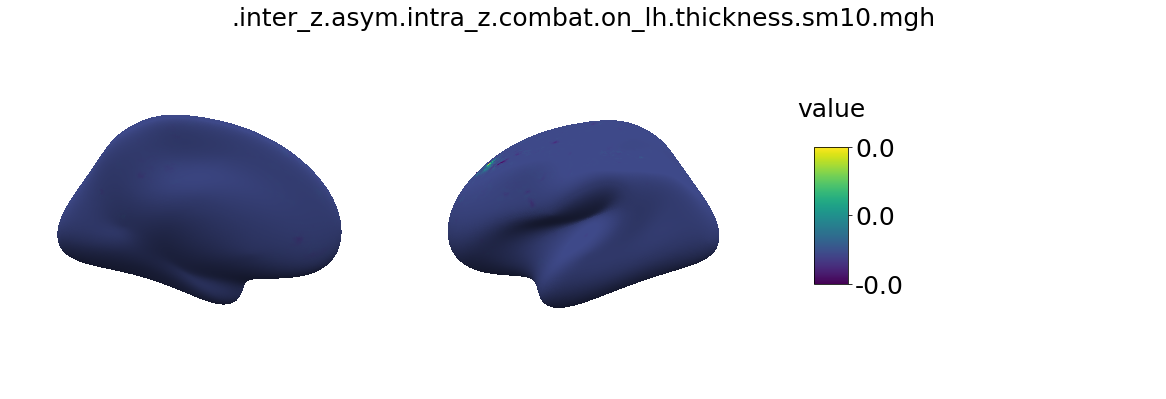

<Figure size 432x288 with 0 Axes>

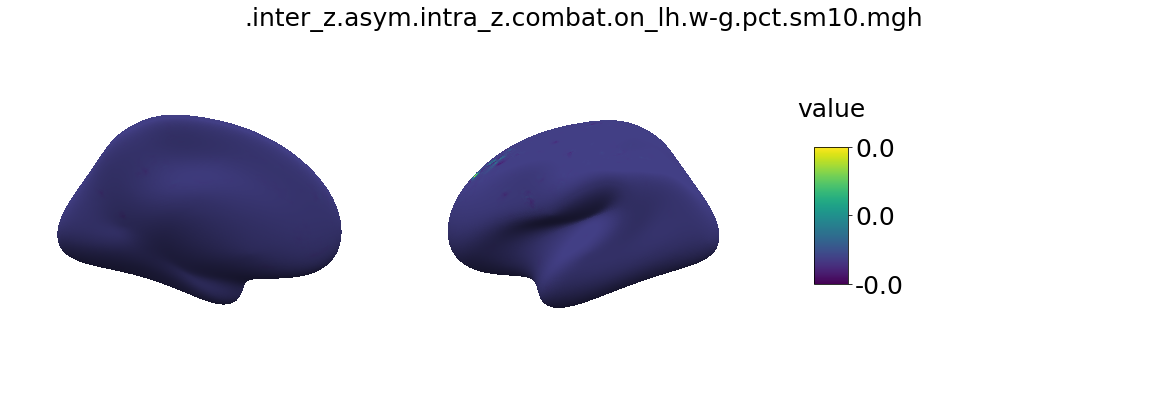

<Figure size 432x288 with 0 Axes>

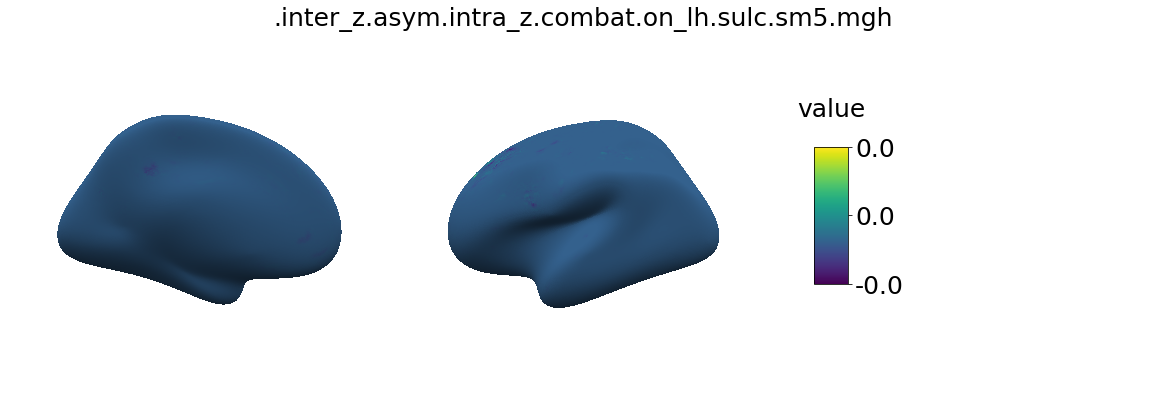

<Figure size 432x288 with 0 Axes>

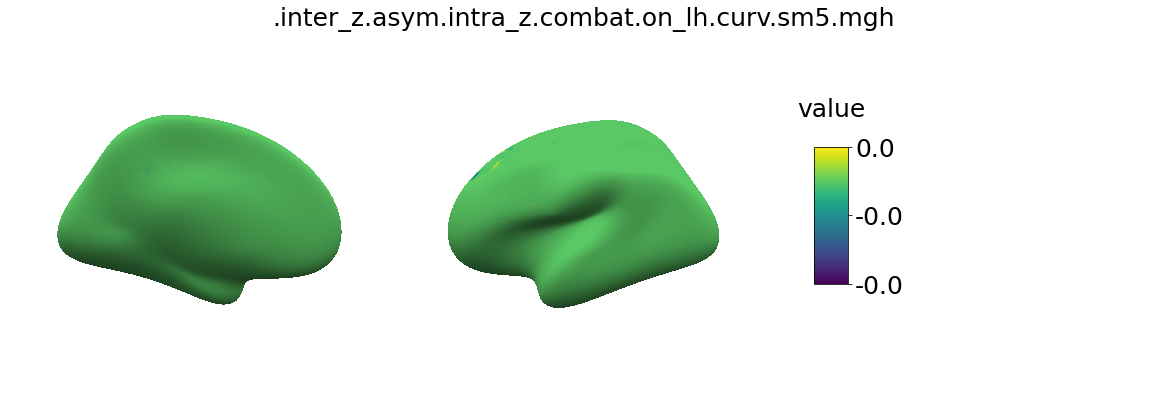

<Figure size 432x288 with 0 Axes>

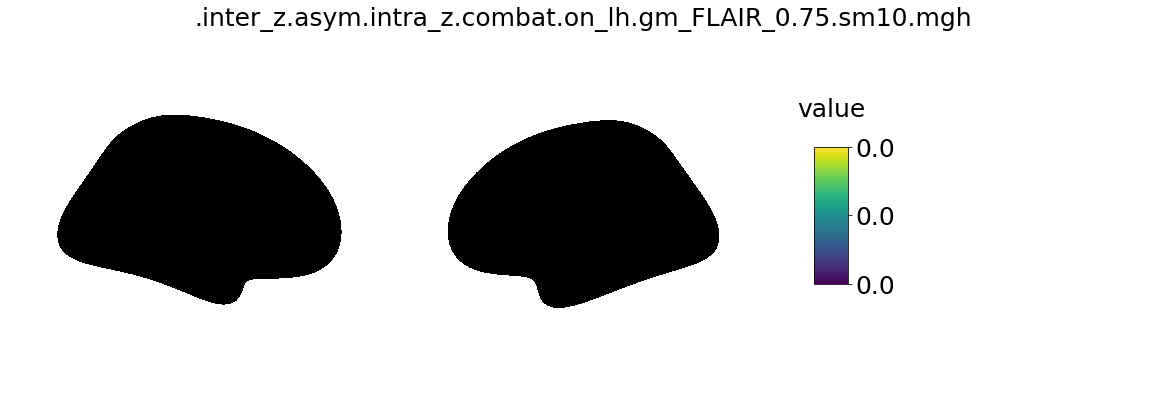

<Figure size 432x288 with 0 Axes>

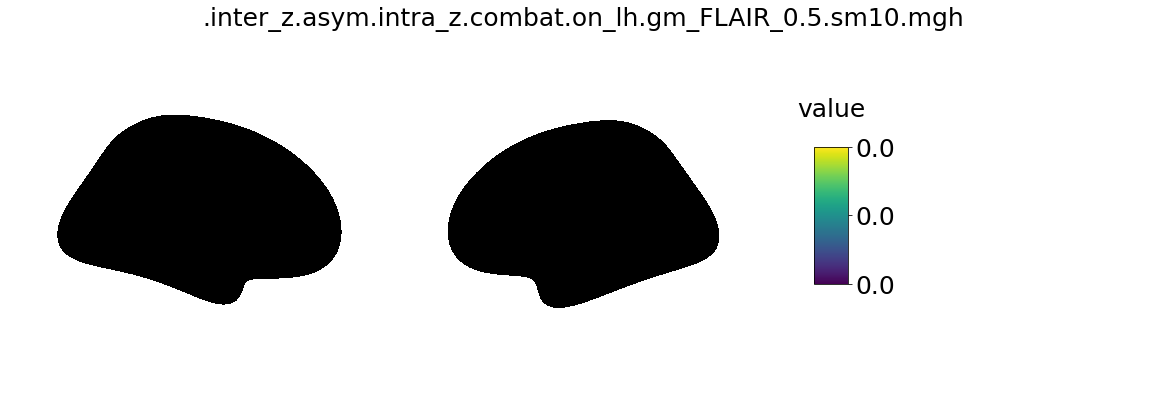

<Figure size 432x288 with 0 Axes>

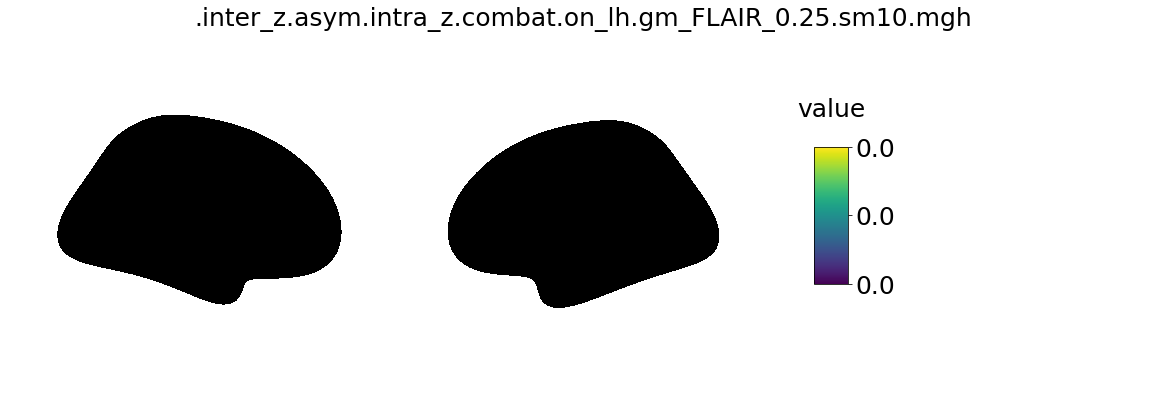

<Figure size 432x288 with 0 Axes>

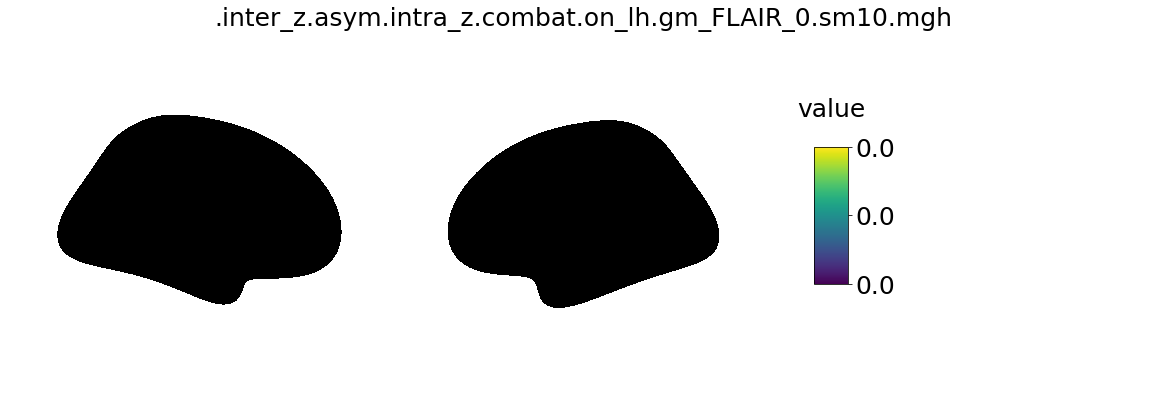

<Figure size 432x288 with 0 Axes>

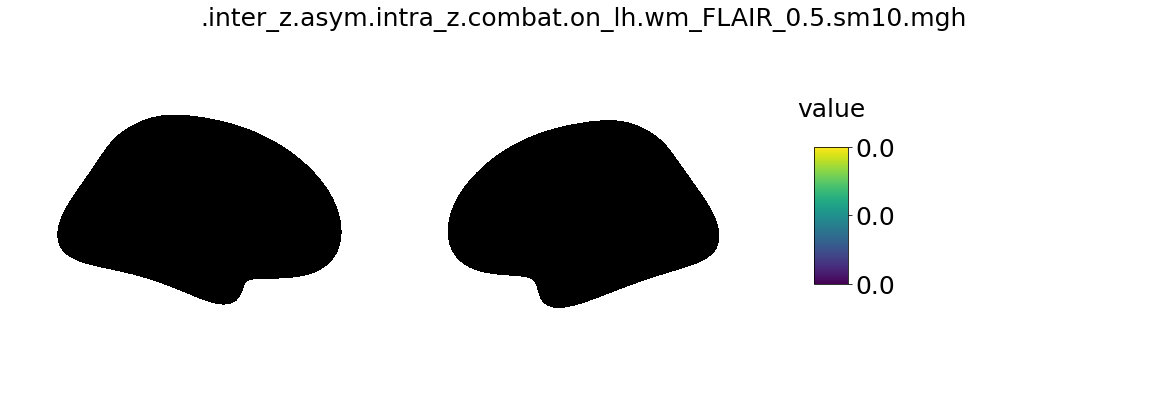

<Figure size 432x288 with 0 Axes>

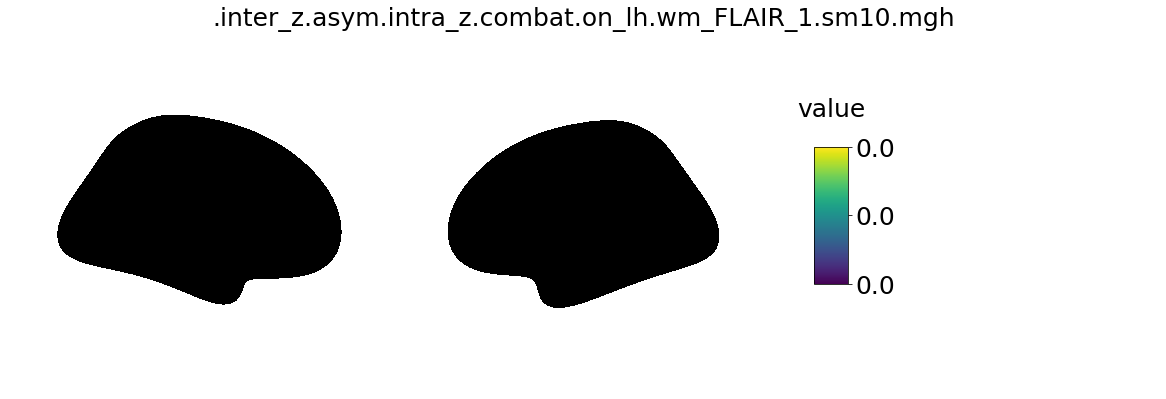

In [11]:
for i, feat in enumerate(features):
    plt.figure()
    msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'],add_medial_wall(saliency['lh'][:,i]), title=feat)

In [15]:
# calculate average saliency inside lesion
threshold = 0.05
saliency['lh'][prediction['lh'] > 0.05].sum(axis=0)

array([-0.06410042, -0.01439981,  0.01265025, -0.02631485, -0.02734532,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07413489,  0.20803883,  0.16535674,  0.07295221,
       -0.0055193 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01292861,  0.05722719,  0.11426034,
        0.01004434, -0.01989328,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [21]:
import seaborn as sns
import pandas as pd

In [23]:
df = pd.DataFrame(saliency['lh'][prediction['lh'] > 0.05], columns=features)

,.combat.on_lh.pial.K_filtered.sm20.mgh,.combat.on_lh.thickness.sm10.mgh,.combat.on_lh.w-g.pct.sm10.mgh,.combat.on_lh.sulc.sm5.mgh,.combat.on_lh.curv.sm5.mgh,.combat.on_lh.gm_FLAIR_0.75.sm10.mgh,.combat.on_lh.gm_FLAIR_0.5.sm10.mgh,.combat.on_lh.gm_FLAIR_0.25.sm10.mgh,.combat.on_lh.gm_FLAIR_0.sm10.mgh,.combat.on_lh.wm_FLAIR_0.5.sm10.mgh,...,.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh,.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh
0,-6.375557e-07,-1.459567e-07,1.758982e-06,-4.894963e-07,1.741441e-06,0.0,0.0,0.0,0.0,0.0,...,-1.162557e-06,-1.072396e-06,-3.607835e-07,2.074362e-07,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.418944e-06,-3.431677e-05,8.699136e-06,1.074753e-05,-7.634535e-06,0.0,0.0,0.0,0.0,0.0,...,-7.709277e-06,6.729850e-06,9.050672e-06,-4.995412e-06,0.0,0.0,0.0,0.0,0.0,0.0
2,1.615469e-06,-1.210880e-05,2.597213e-06,-2.112132e-06,4.390651e-06,0.0,0.0,0.0,0.0,0.0,...,-4.396509e-06,5.649220e-06,-1.594719e-06,1.584019e-05,0.0,0.0,0.0,0.0,0.0,0.0
3,5.658581e-07,-2.769597e-06,6.015409e-07,-3.662529e-06,4.830782e-06,0.0,0.0,0.0,0.0,0.0,...,2.174158e-06,2.826309e-07,-1.150463e-06,1.347070e-06,0.0,0.0,0.0,0.0,0.0,0.0
4,2.448290e-05,-3.135783e-05,-8.843746e-06,8.137463e-07,5.042161e-05,0.0,0.0,0.0,0.0,0.0,...,-6.018339e-05,6.311938e-07,-1.217053e-05,5.535798e-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,-1.215701e-08,1.504815e-06,1.409844e-07,1.241467e-06,-8.977982e-07,0.0,0.0,0.0,0.0,0.0,...,-2.560034e-07,1.088062e-07,2.387130e-07,4.469388e-07,0.0,0.0,0.0,0.0,0.0,0.0
9142,1.661589e-06,2.098620e-08,4.897261e-08,5.896111e-07,4.926388e-07,0.0,0.0,0.0,0.0,0.0,...,-1.811907e-07,-1.320113e-07,7.144336e-07,1.999843e-07,0.0,0.0,0.0,0.0,0.0,0.0
9143,-9.225555e-08,-2.018581e-07,1.054729e-07,2.175676e-07,6.796704e-07,0.0,0.0,0.0,0.0,0.0,...,9.067371e-08,-1.286979e-06,3.398939e-07,1.665328e-07,0.0,0.0,0.0,0.0,0.0,0.0
9144,-7.839262e-07,-1.183702e-06,2.167961e-08,1.506085e-07,-8.060564e-09,0.0,0.0,0.0,0.0,0.0,...,9.186767e-07,7.498788e-07,-3.066894e-07,1.365444e-07,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0, 0, '.combat.on_lh.pial.K_filtered.sm20.mgh'),
 Text(1, 0, '.combat.on_lh.thickness.sm10.mgh'),
 Text(2, 0, '.combat.on_lh.w-g.pct.sm10.mgh'),
 Text(3, 0, '.combat.on_lh.sulc.sm5.mgh'),
 Text(4, 0, '.combat.on_lh.curv.sm5.mgh'),
 Text(5, 0, '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh'),
 Text(6, 0, '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh'),
 Text(7, 0, '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh'),
 Text(8, 0, '.combat.on_lh.gm_FLAIR_0.sm10.mgh'),
 Text(9, 0, '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh'),
 Text(10, 0, '.combat.on_lh.wm_FLAIR_1.sm10.mgh'),
 Text(11, 0, '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh'),
 Text(12, 0, '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh'),
 Text(13, 0, '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh'),
 Text(14, 0, '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh'),
 Text(15, 0, '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh'),
 Text(16, 0, '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh'),
 Text(17, 0, '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm1

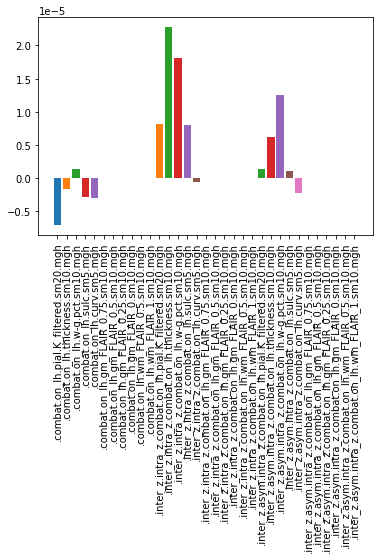

In [35]:
fig, ax = plt.subplots(1,1)
for i, feat in enumerate(features):
    plt.bar(i, df[feat].mean())
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, rotation=90)

In [20]:
sns.barplot?